# Homework 08 Till Meineke

> **Note**: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.

## Dataset

In this homework, we'll build a model for classifying various hair types.
For this, we will use the Hair Type dataset that was obtained from
[Kaggle](https://www.kaggle.com/datasets/kavyasreeb/hair-type-dataset)
and slightly rebuilt.

You can download the target dataset for this homework from
[here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip
unzip data.zip
```

In [1]:
# !mkdir data
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip -O data/data.zip
# !unzip data/data.zip
# !rm -f data/data.zip

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

> **Note:** you will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp).
> You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

### Data Preparation

The dataset contains around 1000 images of hairs in the separate folders
for training and test sets.

In [2]:
train_dir = 'data/train'
test_dir = 'data/test'

### Reproducibility

Reproducibility in deep learning is a multifaceted challenge that requires attention
to both software and hardware details. In some cases, we can't guarantee exactly
the same results during the same experiment runs. Therefore, in this homework we suggest to:
* install tensorflow version 2.17.1
* set the seed generators by:

```python
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
```

In [3]:
import numpy as np
import tensorflow as tf

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

tf.__version__

'2.17.1'

> **Info**
>
>tensorflow version 2.17.1 not available in conda-forge (2024.11.18), you can install it with pip:
>
>```bash
>pip install tensorflow==2.17.1
>```
>
>or use the [conda environment file](../environment.yml) from the homework repository.
>
>```bash
>conda env create -f environment.yml
>conda activate ML_Zoomcamp2024
>```

In [4]:
import os
import shutil

import matplotlib.pyplot as plt

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(200, 200, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

In [5]:
model = models.Sequential()
model.add(keras.Input(shape=(200, 200, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2024-11-29 16:01:17.039352: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-29 16:01:17.039385: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-29 16:01:17.039392: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-29 16:01:17.039409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-29 16:01:17.039422: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.),
              metrics=['acc'])

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

* ~~`mean squared error`~~
* `binary crossentropy`
* ~~`categorical crossentropy`~~
* ~~`cosine similarity`~~

(I asked GitHubCopilot)

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

## Question 2

What's the total number of parameters of the model? You can use the `summary` method for that.

* ~~896~~
* ~~11214912~~
* ~~15896912~~
* 20072512 + 896 + 65 = 20073473

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 313632)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,072,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,073,473 (76.57 MB)

 Trainable params: 20,073,473 (76.57 MB)

 Non-trainable params: 0 (0.00 B)

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets.

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

Found 800 images belonging to 2 classes.


In [10]:
validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True)

Found 201 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 200, 200, 3)
labels batch shape: (20,)


For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/opt/homebrew/Caskroom/miniforge/base/envs/ML_Zoomcamp2024/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-11-29 16:01:17.936434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - acc: 0.5340 - loss: 0.7099 - val_acc: 0.6169 - val_loss: 0.6578
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - acc: 0.5944 - loss: 0.6583 - val_acc: 0.6070 - val_loss: 0.6528
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - acc: 0.6329 - loss: 0.6265 - val_acc: 0.6119 - val_loss: 0.6394
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.6991 - loss: 0.5867 - val_acc: 0.6269 - val_loss: 0.6290
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - acc: 0.7047 - loss: 0.5758 - val_acc: 0.6020 - val_loss: 0.6500
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - acc: 0.7257 - loss: 0.5411 - val_acc: 0.6318 - val_loss: 0.6174
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - acc: 0.7280 - loss: 0.5472 - val_acc: 0.5721 - val_loss: 0.7365
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - acc: 0.7049 - loss: 0.5624 - val_acc: 0.5721 - val_loss: 0.7101
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - acc: 0.7227 - loss: 0

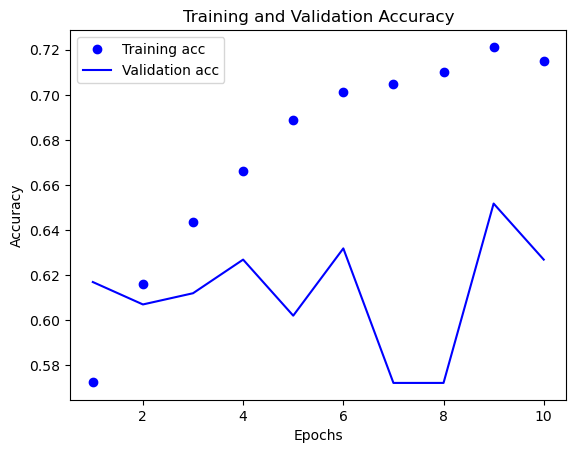

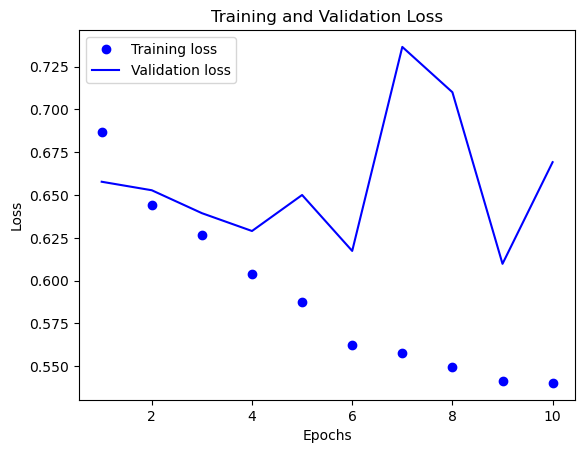

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

## Question 3

What is the median of training accuracy for all the epochs for this model?

* ~~0.15~~
* ~~0.34~~
* ~~0.55~~
* 0.74

In [14]:
acc_median = np.median(acc)
acc_median.round(3)

0.695

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

* 0.033
* ~~0.073~~
* ~~0.133~~
* ~~0.173~~

In [15]:
loss_std = np.std(loss)
loss_std.round(4)

0.0471

In [16]:
loss_std - 0.028

0.01908916823066809

In [17]:
loss_std - 0.068

-0.020910831769331915

possible answers in course management platform:
- 0.028
- ~~0.068~~
- ~~0.128~~
- ~~0.168~~

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [18]:
datagen = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

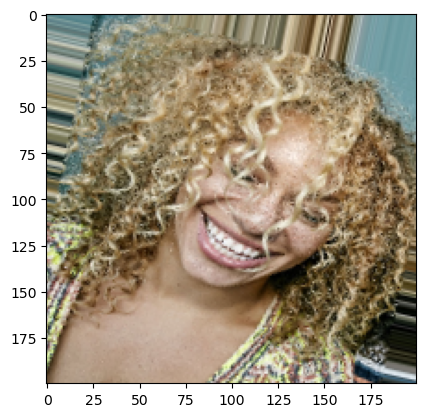

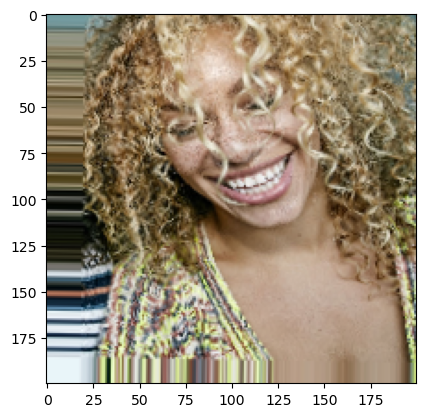

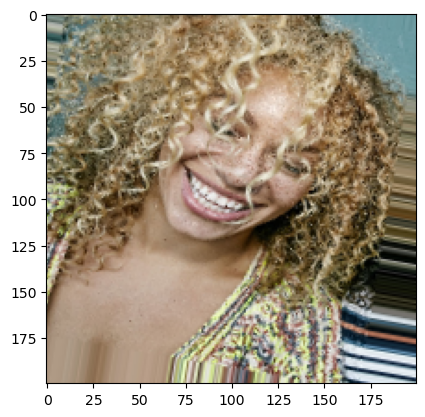

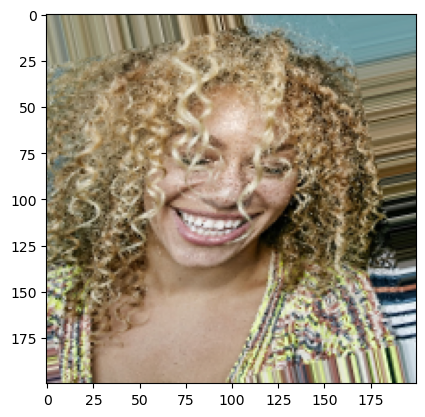

In [19]:
fnames = [os.path.join(train_dir+"/curly", fname) for
    fname in os.listdir(train_dir+"/curly")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(200, 200))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Question 5

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 201 images belonging to 2 classes.


In [24]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/opt/homebrew/Caskroom/miniforge/base/envs/ML_Zoomcamp2024/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - acc: 0.6446 - loss: 0.6435 - val_acc: 0.6766 - val_loss: 0.6148
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - acc: 0.6409 - loss: 0.6322 - val_acc: 0.6468 - val_loss: 0.6038
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - acc: 0.6447 - loss: 0.6183 - val_acc: 0.6418 - val_loss: 0.6207
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - acc: 0.6807 - loss: 0.6105 - val_acc: 0.6468 - val_loss: 0.5958
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - acc: 0.6657 - loss: 0.5842 - val_acc: 0.6219 - val_loss: 0.6035
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - acc: 0.6584 - loss: 0.6079 - val_acc: 0.6567 - val_loss: 0.5956
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - acc: 0.6895 - loss: 0.5976 - val_acc: 0.6318 - val_loss: 0.6603
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - acc: 0.6315 - loss: 0.6348 - val_acc: 0.6418 - val_loss: 0.5927
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - ac

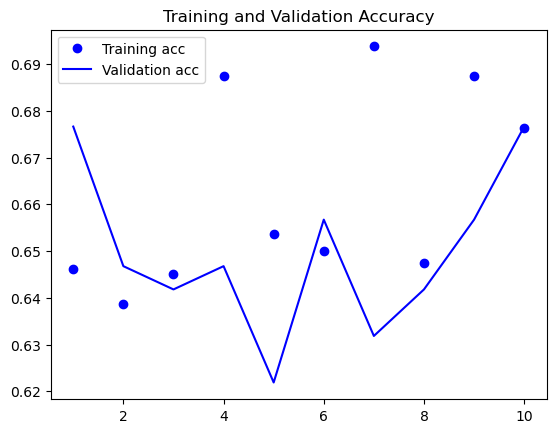

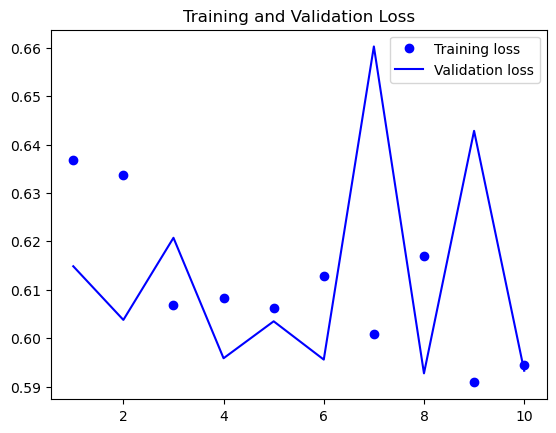

In [25]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

What is the mean of test loss for all the epochs for the model trained with augmentations?

* ~~0.27~~
* 0.57
* ~~0.87~~
* ~~1.17~~

In [26]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug.round(4)

0.6123

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

* ~~0.31~~
* ~~0.51~~
* 0.71
* ~~0.91~~

In [27]:
val_acc_aug[5:10]

[0.6567164063453674,
 0.6318408250808716,
 0.641791045665741,
 0.6567164063453674,
 0.676616907119751]

In [28]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug.round(2)

0.65

## Homework URL


[Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/08-deep-learning/homework.md)

## Time spent on lectures (hours) (optional)

## Time spent on homework (hours) (optional)

2 hours

## FAQ contribution (FAQ document, optional)